In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from astropy import units as u
from astropy import constants as const
from astropy.table import Table, join
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.io.ascii as asciitable
from astropy.io import ascii
import astropy.units as au

import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['mathtext.fontset'] = "cm" 

In [8]:
cmz_clouds_starFormationRate = Table.read('MEGATABLE.csv').to_pandas()
cmz_clouds_starFormationRate=cmz_clouds_starFormationRate.sort_values('ID')
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.set_index('ID').reset_index()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate[['Best SFR estimate','SFR (free fall)', 'SFR CMZoom (Herschel temp)','Total IR SFR','Area']]
print(cmz_clouds_starFormationRate)
drop=cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate['Best SFR estimate'].isnull()]

droplist=drop.tolist()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
cmz_clouds_starFormationRate= cmz_clouds_starFormationRate.drop(cmz_clouds_starFormationRate.index[len(cmz_clouds_starFormationRate)-1]) #drop last row with units

cmz_clouds_mass = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_mass = cmz_clouds_mass.set_index('Structure').reset_index()
cmz_clouds_mass = cmz_clouds_mass['Mass']
cmz_clouds_mass = cmz_clouds_mass.drop(labels=0, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)
cmz_clouds_mass = cmz_clouds_mass.drop(labels=droplist, axis=0)
print(cmz_clouds_starFormationRate)

   Best SFR estimate SFR (free fall) SFR CMZoom (Herschel temp) Total IR SFR  \
0            2.7E-03         2.7E-03                        NaN      1.1E-04   
1            6.0E-08             NaN                        NaN      6.0E-08   
2            6.1E-04         6.1E-04                        NaN      4.8E-06   
3                NaN             NaN                        NaN      8.5E-05   
4            7.9E-04         7.9E-04                        NaN      1.2E-05   
5            1.6E-03         1.6E-03                        NaN      5.2E-05   
6            1.0E-03         1.0E-03                        NaN      2.6E-05   
7            7.0E-04         7.0E-04                        NaN      6.6E-06   
8            3.5E-02             NaN                        NaN      3.5E-02   
9            3.0E-02             NaN                        NaN      3.0E-02   
10           6.9E-04         6.9E-04                        NaN      9.5E-06   
11           1.3E-02             NaN    

In [3]:
#determining which method was used to find the SFR
drop_ffSFR= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate['Best SFR estimate'] != cmz_clouds_starFormationRate['SFR (free fall)']].tolist()
ffSFR=(cmz_clouds_starFormationRate.drop(labels=drop_ffSFR, axis=0))
ffSFR=(ffSFR['Best SFR estimate'].values.astype(float)).tolist()
ffmass= cmz_clouds_mass.drop(labels=drop_ffSFR, axis=0).values.astype(float).tolist()
print(ffSFR)

drop_cmSFR= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate['Best SFR estimate'] != cmz_clouds_starFormationRate['SFR CMZoom (Herschel temp)']].tolist()
cmSFR=(cmz_clouds_starFormationRate.drop(labels=drop_cmSFR, axis=0))
cmSFR=(cmSFR['Best SFR estimate'].values.astype(float)).tolist()
cmmass= (cmz_clouds_mass.drop(labels=drop_cmSFR, axis=0)).values.astype(float).tolist()

cmz_clouds_starFormationRate['Best SFR estimate'] = cmz_clouds_starFormationRate['Best SFR estimate'].astype(float)
cmz_clouds_starFormationRate['Total IR SFR'] = cmz_clouds_starFormationRate['Total IR SFR'].astype(float)
drop_irSFR= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate['Best SFR estimate'] != cmz_clouds_starFormationRate['Total IR SFR']].tolist()
irSFR=cmz_clouds_starFormationRate.drop(labels=drop_irSFR, axis=0)
irSFR=(irSFR['Best SFR estimate'].values.astype(float)).tolist()
irmass= cmz_clouds_mass.drop(labels=drop_irSFR, axis=0).values.astype(float).tolist()

[0.0027, 0.00061, 0.00079, 0.0016, 0.001, 0.0007, 0.00069, 0.0022, 0.0046, 0.0056, 0.0027, 0.0077, 0.0047, 0.0054, 0.026, 0.0095, 0.0041, 0.0035, 0.0019, 0.00023, 0.0002]


In [4]:
cmz_clouds_starFormationRate['Area']=cmz_clouds_starFormationRate['Area'].values.astype(float)

drop_leaves= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate['Area']<4.3e2].tolist()
branches_SFR=(cmz_clouds_starFormationRate.drop(labels=drop_leaves, axis=0))
branches_SFR=(branches_SFR['Best SFR estimate'].values.astype(float)).tolist()
branches_mass= cmz_clouds_mass.drop(labels=drop_leaves, axis=0).values.astype(float).tolist()


drop_branches= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate['Area']>4.3e2].tolist()
leaves_SFR=(cmz_clouds_starFormationRate.drop(labels=drop_branches, axis=0))
leaves_SFR=(leaves_SFR['Best SFR estimate'].values.astype(float)).tolist()
leaves_mass= (cmz_clouds_mass.drop(labels=drop_branches, axis=0)).values.astype(float).tolist()


In [5]:
print(cmz_clouds_starFormationRate) #indexed by leaf IDs 

    Best SFR estimate SFR (free fall) SFR CMZoom (Herschel temp)  \
0        2.700000e-03         2.7E-03                        NaN   
1        6.000000e-08             NaN                        NaN   
2        6.100000e-04         6.1E-04                        NaN   
4        7.900000e-04         7.9E-04                        NaN   
5        1.600000e-03         1.6E-03                        NaN   
6        1.000000e-03         1.0E-03                        NaN   
7        7.000000e-04         7.0E-04                        NaN   
8        3.500000e-02             NaN                        NaN   
9        3.000000e-02             NaN                        NaN   
10       6.900000e-04         6.9E-04                        NaN   
11       1.300000e-02             NaN                        NaN   
12       1.100000e-02             NaN                        NaN   
13       1.000000e-02             NaN                        NaN   
14       8.400000e-03             NaN           

In [27]:
print(cmz_clouds_mass) #indexed by leaf IDs

0     7.8E+04
1     5.5E+03
2     9.6E+03
4     3.0E+04
5     4.9E+04
6     1.3E+05
7     1.6E+04
8     1.6E+07
9     1.4E+07
10    3.2E+04
11    1.1E+07
12    8.5E+06
13    8.3E+06
14    7.3E+06
15    6.3E+06
16    7.2E+04
17    4.1E+06
19    2.6E+06
20    8.9E+04
21    2.9E+05
22    2.7E+04
23    1.6E+06
24    3.2E+05
27    1.9E+06
28    9.6E+04
30    3.5E+05
33    5.1E+05
36    3.4E+05
38    4.9E+04
39    3.4E+05
40    3.3E+04
41    6.8E+04
42    1.1E+05
43    1.3E+06
45    2.8E+05
46    6.8E+04
47    1.1E+05
48    2.2E+05
49    3.1E+04
51    6.8E+04
52    2.0E+04
53    2.7E+04
54    3.5E+04
55    5.7E+03
56    1.0E+04
Name: Mass, dtype: object


In [28]:
#Used in literature properties 
def get_cmap(n, name='jet'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def get_HCNIR(HCN):
    """Jim ́enez-Donaire et al. Table 5"""
    IR = np.log10(10**2.89 * 10**HCN)
    return(IR)

def get_MdenseSFR(Mdense):
    """Lada"""
    SFR = 4.6e-8*Mdense
    return(SFR)

def get_Mdense(HCN, alphaHCN=10):
    """HCN in log - alpha = 10 Gao+Solomon"""
    Mdense = alphaHCN * (10**HCN)
    return(Mdense *au.Msun)

def get_SFR(IR):
    """HCN in log - 3.88 × 10−44 L(TIR) Murphy et al. (2011)"""
    conv = (3.88e-44*au.s/au.erg).to(1/au.Lsun).value


    SFR = conv * (10**IR)
    return(SFR *au.Msun/au.yr)

In [29]:
"""literature properties"""

table = Table.read('./data/galaxies_MJD.csv')
table['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table['logLHCN'], 5) 
table.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table['logLIR']) 
table.add_column(SFR, name='SFR') 

table_WMc = Table.read('./data/clouds_MJD.csv')
table_WMc['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_WMc['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_WMc['logLHCN'], 5) 
table_WMc.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_WMc['logLIR']) 
table_WMc.add_column(SFR, name='SFR') 

table_E = Table.read('./data/empirecents_MJD.csv')
table_E['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_E['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_E['logLHCN'], 5) 
table_E.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_E['logLIR']) 
table_E.add_column(SFR, name='SFR')

table_E = Table.read('./data/empirecents_MJD.csv')
table_E['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_E['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_E['logLHCN'], 5) 
table_E.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_E['logLIR']) 
table_E.add_column(SFR, name='SFR')

table_MW = Table.read('./data/MWCMZ_MJD.csv')
table_MW['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_MW['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_MW['logLHCN'], 5) 
table_MW.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_MW['logLIR']) 
table_MW.add_column(SFR, name='SFR')

table_cl = Table.read('./data/clouds_lada.csv')
table_cl['Mdense'].units = au.Msun
table_cl['SFR'].units = au.Msun/au.yr

table_MWevo = Table.read('./data/MWCMZevo_KK.csv')
table_MWevo['Sigma_mol'].unit = Mdense.unit * au.pc**-2
table_MWevo['Sigma_SFR'].unit = SFR.unit * au.pc**-2

Mdense = table_MWevo['Sigma_mol'] * 500*au.pc * 100*au.pc
SFR = table_MWevo['Sigma_SFR'] * 500*au.pc * 100*au.pc
table_MWevo.add_column(Mdense, name='Mdense') 
table_MWevo.add_column(SFR, name='SFR')

table_ce = Table.read('./data/clouds_evans.csv')
table_ce['Mdense'].unit = au.Msun
table_ce['SFR'].unit = au.Msun/au.yr

table_cvt1 = Table.read('./data/clouds_V16_t1.fits')
table_cvt2 = Table.read('./data/clouds_V16_t2.fits')
table_cvt1['MCloud'].unit = au.Msun * 1e3
table_cvt1['SFR-Rad'].unit = au.Msun / au.Myr
table_cvt1['SFR-MIR'].unit = au.Msun / au.Myr

table_cv = join(table_cvt1, table_cvt2, join_type='outer')
ids = table_cv['Mdense']/table_cv['e_Mdense'] > 3

In [30]:
"""MALATANG properties - https://arxiv.org/pdf/2003.06595.pdf"""

sfr_ngc253 = np.log10(2522e-3)
gas_ngc253 = np.log10(154.6e6)

"""NGC3627 properties - https://academic.oup.com/mnras/article-abstract/506/1/963/6311820?redirectedFrom=fulltext"""

sfr_ngc3627 = np.log10(0.038924883)
gas_ngc3627 = np.log10(18505825/2)

"""M51 properties - https://www.aanda.org/articles/aa/pdf/2019/05/aa34915-18.pdf"""

arr = np.array([[5.97e+4, 5.32e+7],
                [9.24e+4, 5.58e+7],
                [9.61e+4, 5.85e+7],
                [1.49e+5, 5.86e+7],
                [8.88e+4, 3.83e+7],
                [5.97e+4, 3.65e+7],
                [5.97e+4, 1.98e+7],
                [5.97e+4, 1.43e+7]])

sfr1_m51 = np.log10(arr[:,1])
gas1_m51 = np.log10(arr[:,0])

sfr_m51 = np.log10(get_SFR(sfr1_m51).value)
gas_m51 = np.log10(get_Mdense(gas1_m51, 5).value)

gas_m51, sfr_m51

(array([5.47494434, 5.66464198, 5.68169339, 5.87215627, 5.64738297,
        5.47494434, 5.47494434, 5.47494434]),
 array([-2.10228471, -2.08156215, -2.06104048, -2.06029873, -2.24499757,
        -2.26590348, -2.53153116, -2.67286031]))

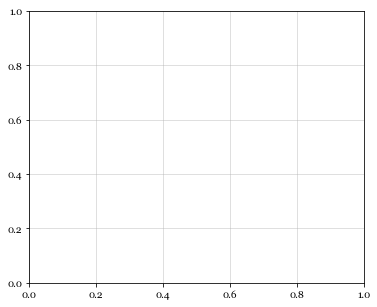

In [31]:
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.5)


In [32]:
"""literature properties - Milky Way Clouds"""

#creating the "density" effect on graph
x = np.log10(np.hstack([table_cl['Mdense'],table_ce['Mdense']]))
y = np.log10(np.hstack([table_cl['SFR'],table_ce['SFR']]))

ax.scatter(x, y, ec='none', fc='black', s=43)
ax.scatter(x, y, ec='none', fc='white', s=30)

#plotting points
ax.scatter(x, y, s=30, ec='none', c='red',alpha=0.4,label="Milky Way Clouds")

#creating the "density" effect on graph
table_WMc['Mdense'] = np.log10(table_WMc['Mdense'])
table_WMc['SFR'] = np.log10(table_WMc['SFR'])

refs = list(np.unique(table_WMc['Ref']))

for i, ref in enumerate(refs):
    
    ids = np.where(table_WMc['Ref']==ref)
    x = table_WMc['Mdense'][ids]
    y = table_WMc['SFR'][ids]
    ax.scatter(x, y, ec='none', fc='black', s=43)
    
for i, ref in enumerate(refs):
    
    ids = np.where(table_WMc['Ref']==ref)
    x = table_WMc['Mdense'][ids]
    y = table_WMc['SFR'][ids]

    ax.scatter(x, y, ec='none', fc='white', s=30)

#plotting points
for i, ref in enumerate(refs):
    
    ids = np.where(table_WMc['Ref']==ref)
    x = table_WMc['Mdense'][ids]
    y = table_WMc['SFR'][ids]
    ax.scatter(x, y, s=30, ec='none',alpha=0.4, c='red')

In [33]:
"""Extragalatic"""
refs = list(np.unique(table_WMc['Ref']))

table['Mdense'] = np.log10(table['Mdense'])
table['SFR'] = np.log10(table['SFR'])

refs = list(np.unique(table['Ref']))
refs.remove('Gallagher18')

#creating the "density" effect on graph
for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, ec='none', fc='black', s=43)

for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, ec='none', fc='white', s=30)

#plotting points
for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    if ref in ['Bigiel15']: 
        ax.scatter(x, y, s=30,ec='none', c='orange',alpha=0.4, label="Disc Galaxies")
    if ref in ['Gao04', 'Usero15', 'Kepley14', 'Crocker']: 
        ax.scatter(x, y, s=30, ec='none',alpha=0.4, c='orange')

    if ref in ['Gao07']: 
        ax.scatter(x, y, s=30, c='#bb6Eff',ec='none',alpha=0.4,label="High-redshift Galaxies")
    
    if ref in ['Krips08']: 
        ax.scatter(x, y, s=30,c='blue', ec='none',alpha=0.4,label= "Starburst Galaxies")
    if ref in ['Garcia-Burillo12', 'Gracia-Carpio08', 'Juneau09', 'Privon15']: 
        ax.scatter(x, y, s=30, c='blue',alpha=0.4, ec="none")

#ax.scatter(np.log10(ffmass), np.log10(ffSFR), ec='none', fc='black',marker='D', s=43)
#ax.scatter(np.log10(ffmass), np.log10(ffSFR), ec='none', fc='white',marker='D', s=30)

#ax.scatter(np.log10(cmmass), np.log10(cmSFR), ec='none', fc='black',marker='o', s=43)
#ax.scatter(np.log10(cmmass), np.log10(cmSFR), ec='none', fc='white',marker='o', s=30)

#ax.scatter(np.log10(irmass), np.log10(irSFR), ec='none', fc='black',marker='X', s=43)
#ax.scatter(np.log10(irmass), np.log10(irSFR), ec='none', fc='white',marker='X', s=30)
#-------------------------------------------------------------------------------------

#plotting points
#ax.scatter(np.log10(ffmass), np.log10(ffSFR),c='c', alpha=0.4, s=30, ec='none', marker='D', label='Free fall SFR')
#ax.scatter(np.log10(cmmass), np.log10(cmSFR),c='c', alpha=0.4, s=30, ec='none', marker='o',label='CMZoom SFR')
#ax.scatter(np.log10(irmass), np.log10(irSFR),c='c', alpha=0.4, s=30, ec='none', marker='X',label='IR SFR')




In [34]:
#Plotting CMZ leaves and branches
ax.scatter(np.log10(branches_mass), np.log10(branches_SFR), ec='none', fc='black',marker='X', s=43)
ax.scatter(np.log10(branches_mass), np.log10(branches_SFR), ec='none', fc='white',marker='X', s=30)

ax.scatter(np.log10(leaves_mass), np.log10(leaves_SFR), ec='none', fc='black',marker='o', s=43)
ax.scatter(np.log10(leaves_mass), np.log10(leaves_SFR), ec='none', fc='white',marker='o', s=30)

ax.scatter(np.log10(branches_mass), np.log10(branches_SFR),c='c', alpha=0.4, s=30, ec='none', marker='X', label='CMZ (branches)')
ax.scatter(np.log10(leaves_mass), np.log10(leaves_SFR),c='c', alpha=0.4, s=30, ec='none', marker='o',label='CMZ (leaves)')

In [35]:
"""Literature properties CMZs"""
#plotting points
ref = 'Gallagher18'
ids = np.where(table['Ref']==ref)
x = table['Mdense'][ids]
y = table['SFR'][ids]

ax.scatter(x, y, ec='none', fc='black', s=43)
ax.scatter(x, y, ec='none', fc='white', s=30)

ax.scatter(x, y, c='#ff00f8', ec='none',alpha=0.5, s=30)

table_E['Mdense'] = np.log10(table_E['Mdense'])
table_E['SFR'] = np.log10(table_E['SFR'])

ax.scatter(table_E['Mdense'], table_E['SFR'], ec='none', fc='black', s=43)
ax.scatter(table_E['Mdense'], table_E['SFR'], ec='none', fc='white', s=30)

ax.scatter(table_E['Mdense'], table_E['SFR'], c='#ff00f8', ec='none',alpha=0.5, s=30,label="Extragalactic CMZs")

ax.scatter(gas_ngc253, sfr_ngc253, ec='none', fc='black', s=43)
ax.scatter(gas_ngc253, sfr_ngc253, ec='none', fc='white', s=30)
ax.scatter(gas_ngc3627, sfr_ngc3627, ec='none', fc='black', s=43)
ax.scatter(gas_ngc3627, sfr_ngc3627, ec='none', fc='white', s=30)
ax.scatter(gas_m51, sfr_m51, ec='none', fc='black', s=43)
ax.scatter(gas_m51, sfr_m51, ec='none', fc='white', s=30)


ax.scatter(gas_ngc253, sfr_ngc253, c='#ff00f8',ec='none',alpha=0.5, s=30)
ax.scatter(gas_ngc3627, sfr_ngc3627, c='#ff00f8',ec='none',alpha=0.5, s=30)
ax.scatter(gas_m51, sfr_m51, c='#ff00f8',ec='none',alpha=0.5, s=30)

In [36]:
"""CMZ properties"""
#error bar
sfr_CMZ_L = np.log10(0.012)
gas_CMZ_L = np.log10(1.8e7)

sfr_CMZ_H = np.log10(0.14)
gas_CMZ_H = np.log10(5.3e7)


x = np.mean([gas_CMZ_L, gas_CMZ_H])
y = np.mean([sfr_CMZ_L, sfr_CMZ_H])
xerr = (gas_CMZ_H-x)
yerr = (sfr_CMZ_H-y)

ax.errorbar([x],[y],xerr=xerr,yerr=yerr,
            zorder=11, c='black', 
            capsize=3, 
            elinewidth=2,
            capthick=2)

ax.scatter(x,y, fc="c",ec='black', lw=2, zorder=11)

In [37]:
gas=np.linspace(1e-7,1e11,10000)
ladaSFR=np.log10((4.6e-8)*1*(gas))
ax.plot(np.log10(gas),ladaSFR,c='k',linestyle='dotted' ,label='Lada et. al (2012)')

ladaSFR=np.log10((4.6e-8)*.1*(gas))
ax.plot(np.log10(gas),ladaSFR,c='k',linestyle='dashed')

In [38]:
print(len(ffmass),cmmass,len(irmass))

21 [350000.0, 510000.0, 49000.0, 33000.0, 68000.0, 110000.0, 68000.0, 110000.0, 220000.0, 68000.0] 12


In [39]:
print(cmSFR)

[0.014, 0.0071, 0.0004, 0.0064, 0.0063, 0.0015, 0.0017, 0.005, 0.017, 0.0027]


In [40]:
print(cmz_clouds_mass)

0     7.8E+04
1     5.5E+03
2     9.6E+03
4     3.0E+04
5     4.9E+04
6     1.3E+05
7     1.6E+04
8     1.6E+07
9     1.4E+07
10    3.2E+04
11    1.1E+07
12    8.5E+06
13    8.3E+06
14    7.3E+06
15    6.3E+06
16    7.2E+04
17    4.1E+06
19    2.6E+06
20    8.9E+04
21    2.9E+05
22    2.7E+04
23    1.6E+06
24    3.2E+05
27    1.9E+06
28    9.6E+04
30    3.5E+05
33    5.1E+05
36    3.4E+05
38    4.9E+04
39    3.4E+05
40    3.3E+04
41    6.8E+04
42    1.1E+05
43    1.3E+06
45    2.8E+05
46    6.8E+04
47    1.1E+05
48    2.2E+05
49    3.1E+04
51    6.8E+04
52    2.0E+04
53    2.7E+04
54    3.5E+04
55    5.7E+03
56    1.0E+04
Name: Mass, dtype: object


In [41]:
print(cmz_clouds_starFormationRate)

    Best SFR estimate SFR (free fall) SFR CMZoom (Herschel temp)  \
0        2.700000e-03         2.7E-03                        NaN   
1        6.000000e-08             NaN                        NaN   
2        6.100000e-04         6.1E-04                        NaN   
4        7.900000e-04         7.9E-04                        NaN   
5        1.600000e-03         1.6E-03                        NaN   
6        1.000000e-03         1.0E-03                        NaN   
7        7.000000e-04         7.0E-04                        NaN   
8        3.500000e-02             NaN                        NaN   
9        3.000000e-02             NaN                        NaN   
10       6.900000e-04         6.9E-04                        NaN   
11       1.300000e-02             NaN                        NaN   
12       1.100000e-02             NaN                        NaN   
13       1.000000e-02             NaN                        NaN   
14       8.400000e-03             NaN           

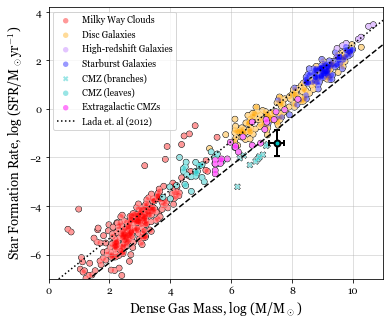

In [42]:
ax.set_ylabel('Star Formation Rate, log (SFR/M$_\odot$yr$^{-1}$)', **{'fontname':'Georgia'}, fontsize=13)
ax.set_xlabel('Dense Gas Mass, log (M/M$_\odot$)',**{'fontname':'Georgia'},fontsize=13)
mpl.rc('font', family='Georgia')
ax.set_xlim([0, 11])
ax.set_ylim([-7, 4.2])
ax.legend(fontsize=9)
fig

In [43]:
fig.savefig('SFRvsDenseGas.pdf')